<a href="https://colab.research.google.com/github/musk05/GRIP-Internship/blob/main/Prediction_using_Decision_Tree_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Decision Tree Algorithm

In [ ]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading the data set
df= pd.read_csv("iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()
#Found out that there's no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Data Preprocessing

In [ ]:
#Performing label encoding to covert categorical data to numeric values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
import pandas as pd
data = pd.DataFrame({'index':[0,1,2],
        'Species':['Iris-setosa','Iris-versicolor','Iris-virginica']})
print(data)

   index          Species
0      0      Iris-setosa
1      1  Iris-versicolor
2      2   Iris-virginica


In [ ]:
df['Species_num']= le.fit_transform(df['Species'])

In [ ]:
# df

In [ ]:
#Dropping columns which are not needed for prediction
df.drop(['Id'],axis = 1,inplace = True)

In [ ]:
df['Species_num'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({'index':[0,1,2],
        'Species':['Iris-setosa','Iris-versicolor','Iris-virginica']})
print(data)

   index          Species
0      0      Iris-setosa
1      1  Iris-versicolor
2      2   Iris-virginica


### Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data for training and testing
# Here the independent variable is Species_num
X = df.iloc[:,[0,1,2,3]]   
Y = df.iloc[:,[5]]    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X,Y)

In [ ]:
# Text Representation of the Decision Tree classifier
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



### Graphical visualization of Decision Tree Classifier

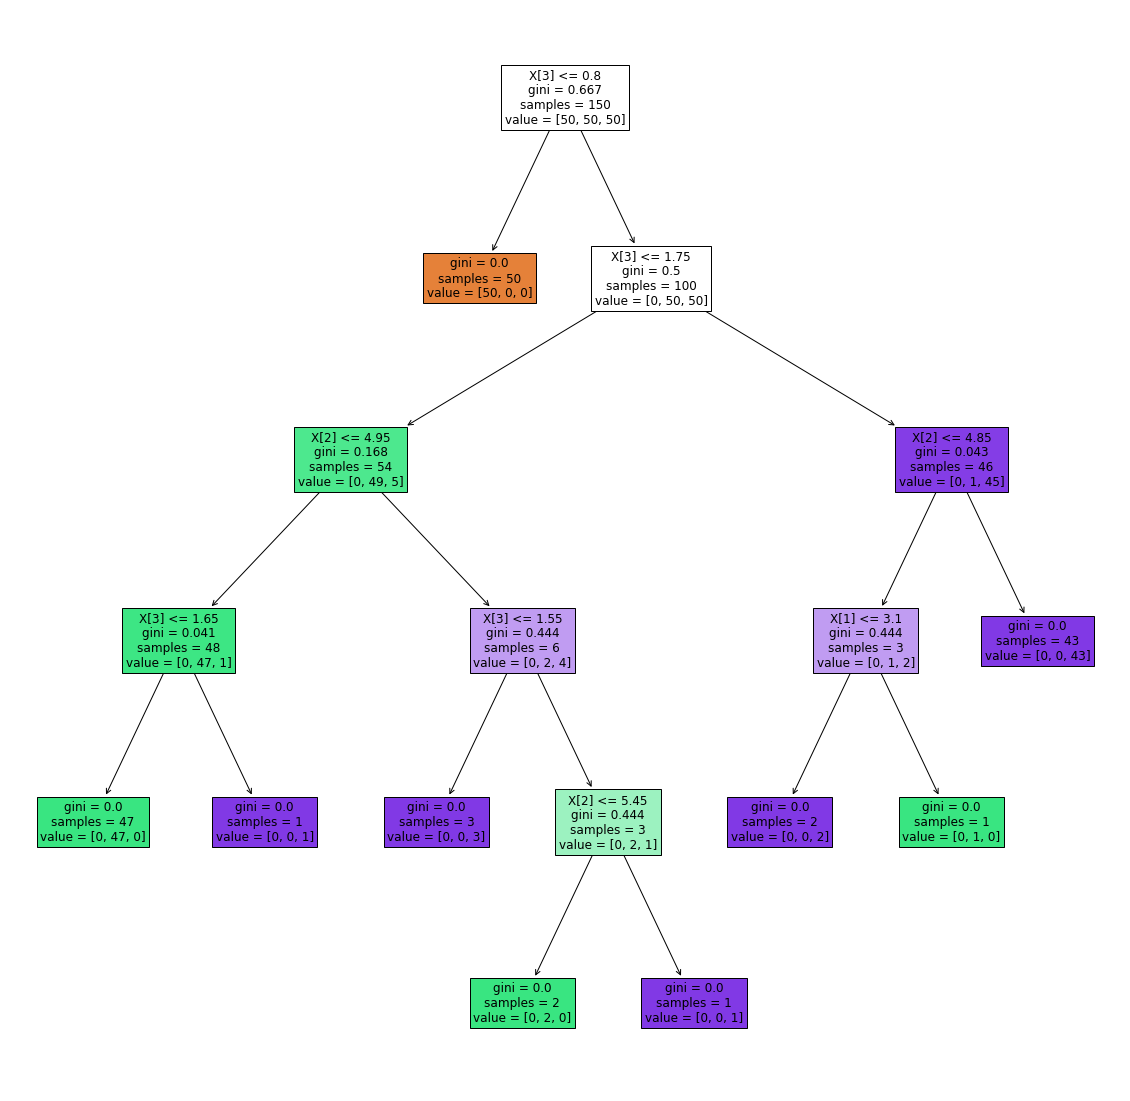

In [ ]:
clf = DecisionTreeClassifier().fit(X,Y)
plt.figure(figsize = (20,20))
tree.plot_tree(clf.fit(X, Y), filled = True,fontsize = 12)
plt.show()

### Model Fitting

In [ ]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [ ]:
clf.score(X_test, Y_test)

0.9736842105263158

### To predict the right class accordingly if we feed any new data to the classifier

In [ ]:
import numpy as np
new_prediction = clf.predict(np.array([[5.1,3.5,1.4,0.2]]))
print("Predicted class:" , new_prediction)

Predicted class: [0]
